# Tests

## 1. Iterations tests

Let's consider task of minimization for convex quadratic form on fixed square when there is global solution in this square.

<IPython.core.display.Javascript object>


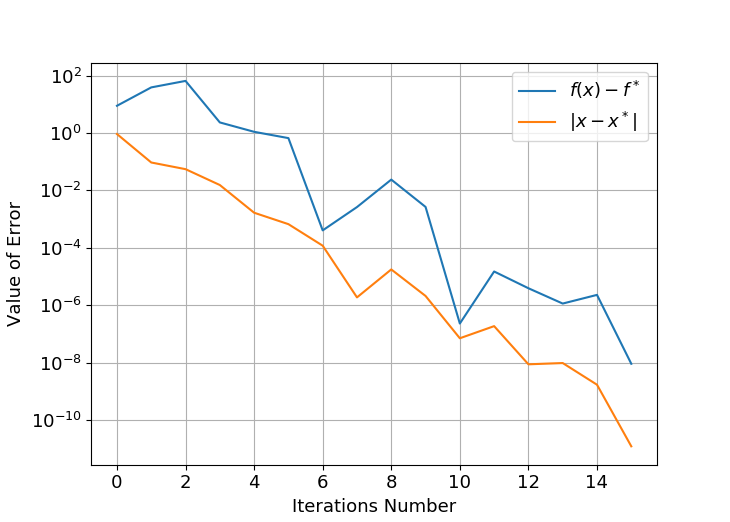

Theoretical Iteration Number through function constant 39.0
Theoretical Iteration Number through gradient constant 19.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test(1e-8)

Now we consider task of minimization for convex quadratic form on fixed square when there is not global solution in this square.

<IPython.core.display.Javascript object>


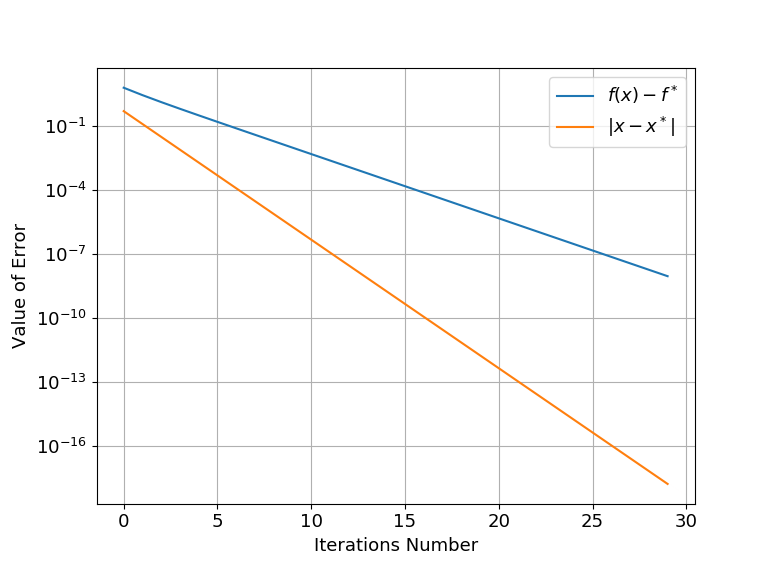

Theoretical Iteration Number through function constant 30.0
Theoretical Iteration Number through gradient constant 14.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test_2(1e-8)

## 2. Estimates for accuracy of solution on segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$

where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative with the respect to $y$ for parallel to axis $Ox$ segment and derivative with the respect to $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{|f'(\textbf{x}_{cur})|}{L},$$

where $\textbf{x}_{cur}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. The $f'(\textbf{x}_{cur})$ is a derivative with the respect to $x$ for parallel to axis $Oy$ segment and is a derivative with the respect to $y$ for parallel to axis $Ox$.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

In [11]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
d = estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.71ms
Mean time (Constant estimate) = 1.42ms
Mean time (Current gradient) = 0.74ms
eps =  1.0e-01
Mean time (True gradient) = 1.10ms
Mean time (Constant estimate) = 2.57ms
Mean time (Current gradient) = 1.16ms
eps =  1.0e-02
Mean time (True gradient) = 1.71ms
Mean time (Constant estimate) = 4.53ms
Mean time (Current gradient) = 1.84ms
eps =  1.0e-03
Mean time (True gradient) = 2.43ms
Mean time (Constant estimate) = 7.18ms
Mean time (Current gradient) = 2.63ms
eps =  1.0e-04
Mean time (True gradient) = 3.12ms
Mean time (Constant estimate) = 10.12ms
Mean time (Current gradient) = 3.36ms
eps =  1.0e-05
Mean time (True gradient) = 3.78ms
Mean time (Constant estimate) = 13.57ms
Mean time (Current gradient) = 4.12ms
eps =  1.0e-06
Mean time (True gradient) = 4.94ms
Mean time (Constant estimate) = 19.16ms
Mean time (Current gradient) = 5.37ms


<IPython.core.display.Javascript object>


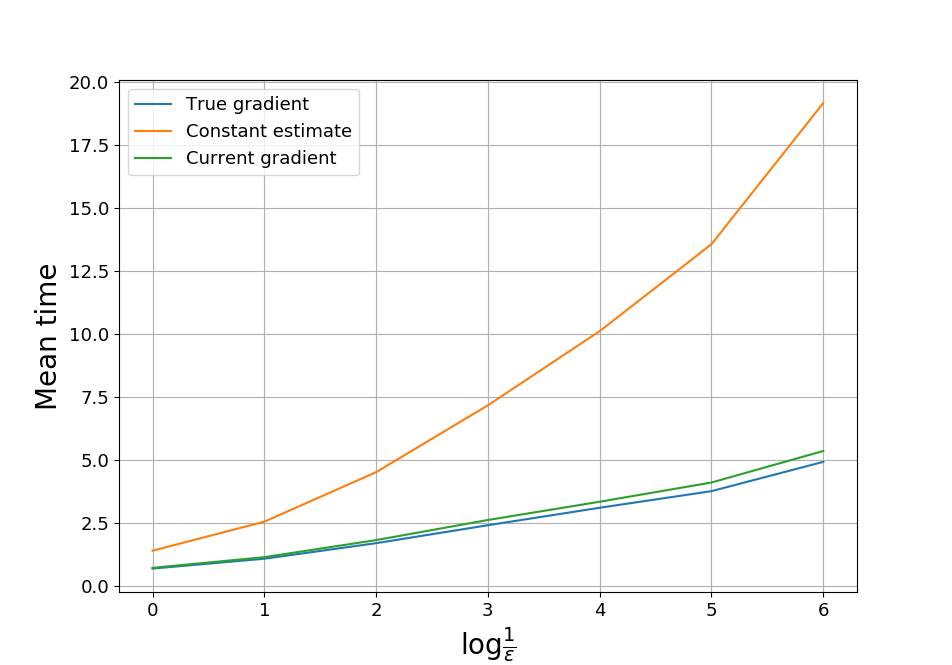

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
cur = dict()
keys = list(d.keys())
keys.sort()
for i in keys:
    for j in d[i]:
        if cur.__contains__(j):
            cur[j].append(d[i][j])
        else:
            cur[j] = [d[i][j]]
k = cur.keys()
import numpy as np
keys = [-np.log(i)/np.log(10) for i in keys]
for j in k:
    plt.plot(keys, cur[j])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(k, fontsize = n)
n = 20
plt.xlabel(r'$\log\frac{1}{\epsilon}$', fontsize = n)
plt.ylabel('Mean time', fontsize = n)
plt.savefig('1.pdf')

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 100
s=time.time()
results, f = comparison.strategy_LogSumExp(N, time_max = time_max, eps = 1e-5)
results_copy1 = results, f
time.time()-s

R0 0.2189929347170073
L_f 756.6583710542733
CurGrad
ConstEst
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xaaa0f2ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4602c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c460ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4612c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c461ac>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4624c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4634c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4642c>>
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c4650c>>
<bound method halving_square.ConstEst of <method_functions.halving_

19.26046633720398

In [2]:
results.keys()
results = {i: results[i][3][-1]-results[i][3][0] for i in results}
results

{'HalvingSquare-CurGrad': 2.119920253753662,
 1.0: 6.879649639129639,
 0.1: 9.324229001998901,
 0.010000000000000002: 11.711790800094604,
 0.0010000000000000002: 13.192879438400269,
 0.00010000000000000002: 14.657142877578735,
 1.0000000000000003e-05: 15.977511405944824,
 1.0000000000000004e-06: 17.171669483184814,
 1.0000000000000004e-07: 18.18428063392639,
 1.0000000000000005e-08: 18.73340129852295,
 1.0000000000000005e-09: 19.121264934539795}

## 3. Comparison for LogSumExp

###  N = 10, $\epsilon$ = 0.1

In [7]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 30
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 0.1)
results_copy1 = results, f
time.time()-s

hello
R0 0.2189929347170073
L_f 880.9329033526246
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xb49b69ec>> 0.0001680425894123561
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa0c97b6c>> None


32.289108991622925

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1])+10 for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 137
HalvingSquare-ConstEst 149
Ellipsoids 9
GD 8


<IPython.core.display.Javascript object>


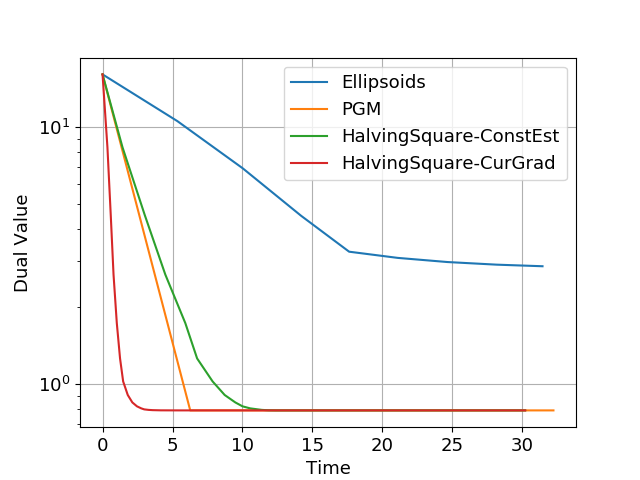

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.semilogy(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

###  N = 10, $\epsilon$ = 0.01

In [4]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 30
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 0.01)
results_copy1 = results, f
time.time()-s

hello
R0 0.2189929347170073
L_f 976.5402980881878
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa1781e6c>> 9.039939471185843e-06
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa031ed8c>> None


32.77493953704834

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1])+10 for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 109
HalvingSquare-ConstEst 82
GD 5
Ellipsoids 6


<IPython.core.display.Javascript object>


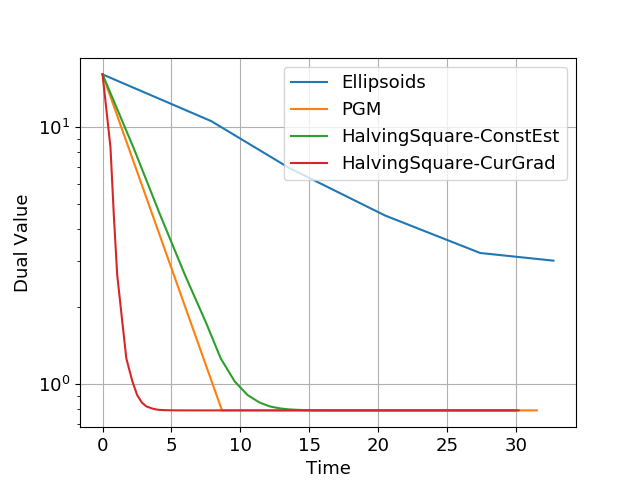

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.semilogy(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

###  N = 10, $\epsilon$ = 0.001

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 30
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 0.001)
results_copy1 = results, f
time.time()-s

hello
R0 0.2189929347170073
L_f 834.9430927024683
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa8c8e20c>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8c8e28c>> 1.2277304109470772e-06


32.45608711242676

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1])+10 for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 122
HalvingSquare-ConstEst 67
Ellipsoids 5
GD 5


<IPython.core.display.Javascript object>


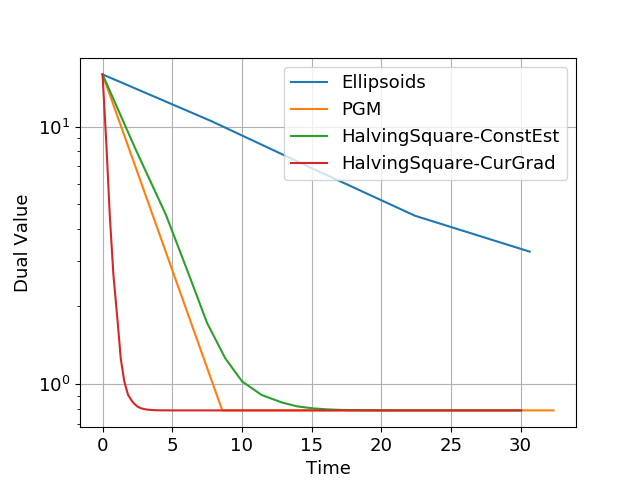

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.semilogy(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

###  N = 10, $\epsilon$ = 1e-10

In [10]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 30
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max, eps = 1e-10)
results_copy1 = results, f
time.time()-s

hello
R0 0.2189929347170073
L_f 969.3593351806533
Ellipsoids
CurGrad
ConstEst
GD
<bound method halving_square.CurGrad of <method_functions.halving_square object at 0xa032b26c>> None
<bound method halving_square.ConstEst of <method_functions.halving_square object at 0xa8cf10cc>> 3.904065881736024e-14


43.92184281349182

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1])+10 for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 102
HalvingSquare-ConstEst 9
Ellipsoids 3
GD 3


<IPython.core.display.Javascript object>


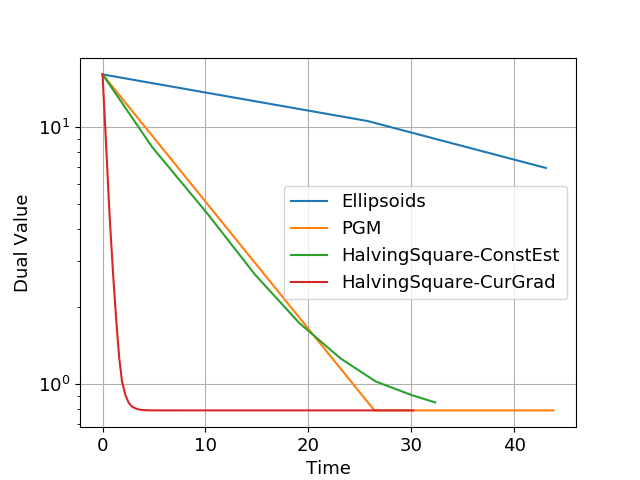

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.semilogy(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

## 4.  Comparison For LogSumExp N = 100

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 100
time_max = 30
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max)
results_copy1 = results, f
time.time()-s

R0 3.0381311745351813
L_f 995.255739665203
Ellipsoids
CurGrad
ConstEst
GD


./Tests_functions/test_functions.py:201: RuntimeWarning: overflow encountered in exp
  grad = lambda x: a *np.exp(a*x - m(x)*np.ones(a.shape))/(1/np.exp(m(x))+np.exp(a*x-m(x)*np.ones(a.shape)).sum()) + 2*x*self.C


KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]]
    new_dict[key] = (times, f_value)

Ellipsoids 2
GD 2
HalvingSquare-ConstEst 2
HalvingSquare-CurGrad 2


<IPython.core.display.Javascript object>


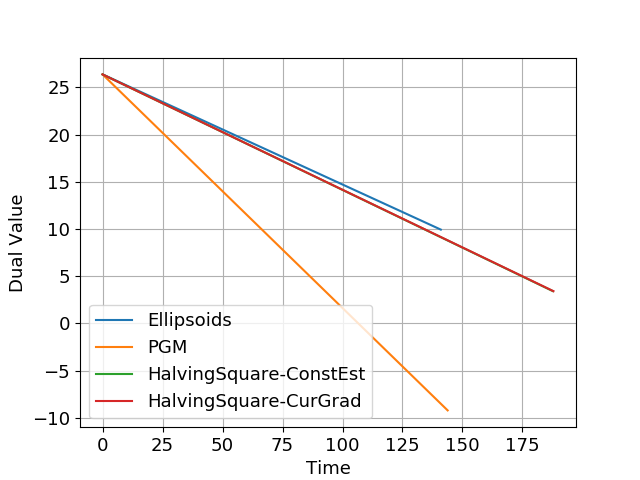

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

# HS Test

In [14]:
import sys
sys.path.append('Tests_functions')
from test_functions import LogSumExp
import numpy as np
a = np.random.uniform(-100, 100, (10,))
f = LogSumExp(a)
Q = f.get_square()
L, M = f.lipschitz_function(Q), f.lipschitz_gradient(Q)
lambda_ = (Q[0]+Q[1]) /10, (Q[2]+Q[3]) /10

R0 3.3911360159417883
L_f 101.65540346038796


In [15]:
from method_functions import get_grad
get_grad(f, lambda_, 0.00001)

0.7544853139204805 2.5585623215348874 0.5289223594331226 0.3492977709544788
0.7544853139204805 1.9303976963483627 0.7377439473749757 0.16639494423018272
0.7544853139204805 1.4564567119207668 0.7569593305975538 0.06341900496963447
0.7544853139204805 1.0988751995051305 0.6299289633212406 0.06948565072055232
0.7544853139204805 0.829085199858059 0.4375967242962804 0.09873956530982596
0.7544853139204805 0.6255326072817319 0.23770710180856947 0.11274458156803975
0.7544853139204805 0.4719551655724541 0.06171428052778544 0.11423570859065707
0.7544853139204805 0.35608324125332536 -0.07791739111235527 0.10773767624822306
0.7544853139204805 0.26865957605883733 -0.18076977443096173 0.09673642780397136
0.7544853139204805 0.20269970458049508 -0.25191680146742557 0.08380484223363413
0.7544853139204805 0.15293395024200349 -0.2838966636107131 0.06974516744271303
0.7544853139204805 0.11538641945743713 -0.31035810384226525 0.052788698739622775
0.7544853139204805 0.08705735890650469 -0.3151572947821718 0.

array([1.29231804, 0.94277804])

In [22]:
import numpy as np
A = np.random.uniform(-1, 1, (1000,1000))
A = A.T.dot(A)
l = list(np.linalg.eig(A)[0])
l.sort()
l

[3.0766614580476743e-05,
 0.0014850433727424922,
 0.0034644777641003564,
 0.006717160177132505,
 0.010492424639380868,
 0.0169026241967178,
 0.029985862803803106,
 0.04152163261577719,
 0.0598235533517778,
 0.07927112692345928,
 0.08566722506474875,
 0.08797811809095536,
 0.10777121919460124,
 0.1212686621733375,
 0.1287111544083145,
 0.1653901497809855,
 0.18774842389394109,
 0.19477785315989832,
 0.2428813098754976,
 0.2678874539223607,
 0.3357354315887975,
 0.37162687666784977,
 0.3758288114364635,
 0.4165424533976489,
 0.4556304312467096,
 0.5143140438876298,
 0.5639134393270522,
 0.6105556751131911,
 0.640629415810164,
 0.6762132995468808,
 0.7385820325430194,
 0.8142169077536477,
 0.848577109635483,
 0.880866154559693,
 0.890695581084463,
 1.0016620945531918,
 1.0827609919452579,
 1.103722469635096,
 1.145023680018249,
 1.2004763839192396,
 1.2792157858816213,
 1.361277859590069,
 1.4555352495785345,
 1.48464201625318,
 1.5238833144169512,
 1.625930619422367,
 1.6452353999156828,

In [4]:
for k in range(10000):
    print(k,1/(k+4) > ((1000-1)/(1000+1))**k)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


1481 False
1482 False
1483 False
1484 False
1485 False
1486 False
1487 False
1488 False
1489 False
1490 False
1491 False
1492 False
1493 False
1494 False
1495 False
1496 False
1497 False
1498 False
1499 False
1500 False
1501 False
1502 False
1503 False
1504 False
1505 False
1506 False
1507 False
1508 False
1509 False
1510 False
1511 False
1512 False
1513 False
1514 False
1515 False
1516 False
1517 False
1518 False
1519 False
1520 False
1521 False
1522 False
1523 False
1524 False
1525 False
1526 False
1527 False
1528 False
1529 False
1530 False
1531 False
1532 False
1533 False
1534 False
1535 False
1536 False
1537 False
1538 False
1539 False
1540 False
1541 False
1542 False
1543 False
1544 False
1545 False
1546 False
1547 False
1548 False
1549 False
1550 False
1551 False
1552 False
1553 False
1554 False
1555 False
1556 False
1557 False
1558 False
1559 False
1560 False
1561 False
1562 False
1563 False
1564 False
1565 False
1566 False
1567 False
1568 False
1569 False
1570 False
1571 False

2231 False
2232 False
2233 False
2234 False
2235 False
2236 False
2237 False
2238 False
2239 False
2240 False
2241 False
2242 False
2243 False
2244 False
2245 False
2246 False
2247 False
2248 False
2249 False
2250 False
2251 False
2252 False
2253 False
2254 False
2255 False
2256 False
2257 False
2258 False
2259 False
2260 False
2261 False
2262 False
2263 False
2264 False
2265 False
2266 False
2267 False
2268 False
2269 False
2270 False
2271 False
2272 False
2273 False
2274 False
2275 False
2276 False
2277 False
2278 False
2279 False
2280 False
2281 False
2282 False
2283 False
2284 False
2285 False
2286 False
2287 False
2288 False
2289 False
2290 False
2291 False
2292 False
2293 False
2294 False
2295 False
2296 False
2297 False
2298 False
2299 False
2300 False
2301 False
2302 False
2303 False
2304 False
2305 False
2306 False
2307 False
2308 False
2309 False
2310 False
2311 False
2312 False
2313 False
2314 False
2315 False
2316 False
2317 False
2318 False
2319 False
2320 False
2321 False

2980 False
2981 False
2982 False
2983 False
2984 False
2985 False
2986 False
2987 False
2988 False
2989 False
2990 False
2991 False
2992 False
2993 False
2994 False
2995 False
2996 False
2997 False
2998 False
2999 False
3000 False
3001 False
3002 False
3003 False
3004 False
3005 False
3006 False
3007 False
3008 False
3009 False
3010 False
3011 False
3012 False
3013 False
3014 False
3015 False
3016 False
3017 False
3018 False
3019 False
3020 False
3021 False
3022 False
3023 False
3024 False
3025 False
3026 False
3027 False
3028 False
3029 False
3030 False
3031 False
3032 False
3033 False
3034 False
3035 False
3036 False
3037 False
3038 False
3039 False
3040 False
3041 False
3042 False
3043 False
3044 False
3045 False
3046 False
3047 False
3048 False
3049 False
3050 False
3051 False
3052 False
3053 False
3054 False
3055 False
3056 False
3057 False
3058 False
3059 False
3060 False
3061 False
3062 False
3063 False
3064 False
3065 False
3066 False
3067 False
3068 False
3069 False
3070 False

3730 False
3731 False
3732 False
3733 False
3734 False
3735 False
3736 False
3737 False
3738 False
3739 False
3740 False
3741 False
3742 False
3743 False
3744 False
3745 False
3746 False
3747 False
3748 False
3749 False
3750 False
3751 False
3752 False
3753 False
3754 False
3755 False
3756 False
3757 False
3758 False
3759 False
3760 False
3761 False
3762 False
3763 False
3764 False
3765 False
3766 False
3767 False
3768 False
3769 False
3770 False
3771 False
3772 False
3773 False
3774 False
3775 False
3776 False
3777 False
3778 False
3779 False
3780 False
3781 False
3782 False
3783 False
3784 False
3785 False
3786 False
3787 False
3788 False
3789 False
3790 False
3791 False
3792 False
3793 False
3794 False
3795 False
3796 False
3797 False
3798 False
3799 False
3800 False
3801 False
3802 False
3803 False
3804 False
3805 False
3806 False
3807 False
3808 False
3809 False
3810 False
3811 False
3812 False
3813 False
3814 False
3815 False
3816 False
3817 False
3818 False
3819 False
3820 False

5230 True
5231 True
5232 True
5233 True
5234 True
5235 True
5236 True
5237 True
5238 True
5239 True
5240 True
5241 True
5242 True
5243 True
5244 True
5245 True
5246 True
5247 True
5248 True
5249 True
5250 True
5251 True
5252 True
5253 True
5254 True
5255 True
5256 True
5257 True
5258 True
5259 True
5260 True
5261 True
5262 True
5263 True
5264 True
5265 True
5266 True
5267 True
5268 True
5269 True
5270 True
5271 True
5272 True
5273 True
5274 True
5275 True
5276 True
5277 True
5278 True
5279 True
5280 True
5281 True
5282 True
5283 True
5284 True
5285 True
5286 True
5287 True
5288 True
5289 True
5290 True
5291 True
5292 True
5293 True
5294 True
5295 True
5296 True
5297 True
5298 True
5299 True
5300 True
5301 True
5302 True
5303 True
5304 True
5305 True
5306 True
5307 True
5308 True
5309 True
5310 True
5311 True
5312 True
5313 True
5314 True
5315 True
5316 True
5317 True
5318 True
5319 True
5320 True
5321 True
5322 True
5323 True
5324 True
5325 True
5326 True
5327 True
5328 True
5329 True


6729 True
6730 True
6731 True
6732 True
6733 True
6734 True
6735 True
6736 True
6737 True
6738 True
6739 True
6740 True
6741 True
6742 True
6743 True
6744 True
6745 True
6746 True
6747 True
6748 True
6749 True
6750 True
6751 True
6752 True
6753 True
6754 True
6755 True
6756 True
6757 True
6758 True
6759 True
6760 True
6761 True
6762 True
6763 True
6764 True
6765 True
6766 True
6767 True
6768 True
6769 True
6770 True
6771 True
6772 True
6773 True
6774 True
6775 True
6776 True
6777 True
6778 True
6779 True
6780 True
6781 True
6782 True
6783 True
6784 True
6785 True
6786 True
6787 True
6788 True
6789 True
6790 True
6791 True
6792 True
6793 True
6794 True
6795 True
6796 True
6797 True
6798 True
6799 True
6800 True
6801 True
6802 True
6803 True
6804 True
6805 True
6806 True
6807 True
6808 True
6809 True
6810 True
6811 True
6812 True
6813 True
6814 True
6815 True
6816 True
6817 True
6818 True
6819 True
6820 True
6821 True
6822 True
6823 True
6824 True
6825 True
6826 True
6827 True
6828 True


7979 True
7980 True
7981 True
7982 True
7983 True
7984 True
7985 True
7986 True
7987 True
7988 True
7989 True
7990 True
7991 True
7992 True
7993 True
7994 True
7995 True
7996 True
7997 True
7998 True
7999 True
8000 True
8001 True
8002 True
8003 True
8004 True
8005 True
8006 True
8007 True
8008 True
8009 True
8010 True
8011 True
8012 True
8013 True
8014 True
8015 True
8016 True
8017 True
8018 True
8019 True
8020 True
8021 True
8022 True
8023 True
8024 True
8025 True
8026 True
8027 True
8028 True
8029 True
8030 True
8031 True
8032 True
8033 True
8034 True
8035 True
8036 True
8037 True
8038 True
8039 True
8040 True
8041 True
8042 True
8043 True
8044 True
8045 True
8046 True
8047 True
8048 True
8049 True
8050 True
8051 True
8052 True
8053 True
8054 True
8055 True
8056 True
8057 True
8058 True
8059 True
8060 True
8061 True
8062 True
8063 True
8064 True
8065 True
8066 True
8067 True
8068 True
8069 True
8070 True
8071 True
8072 True
8073 True
8074 True
8075 True
8076 True
8077 True
8078 True


9478 True
9479 True
9480 True
9481 True
9482 True
9483 True
9484 True
9485 True
9486 True
9487 True
9488 True
9489 True
9490 True
9491 True
9492 True
9493 True
9494 True
9495 True
9496 True
9497 True
9498 True
9499 True
9500 True
9501 True
9502 True
9503 True
9504 True
9505 True
9506 True
9507 True
9508 True
9509 True
9510 True
9511 True
9512 True
9513 True
9514 True
9515 True
9516 True
9517 True
9518 True
9519 True
9520 True
9521 True
9522 True
9523 True
9524 True
9525 True
9526 True
9527 True
9528 True
9529 True
9530 True
9531 True
9532 True
9533 True
9534 True
9535 True
9536 True
9537 True
9538 True
9539 True
9540 True
9541 True
9542 True
9543 True
9544 True
9545 True
9546 True
9547 True
9548 True
9549 True
9550 True
9551 True
9552 True
9553 True
9554 True
9555 True
9556 True
9557 True
9558 True
9559 True
9560 True
9561 True
9562 True
9563 True
9564 True
9565 True
9566 True
9567 True
9568 True
9569 True
9570 True
9571 True
9572 True
9573 True
9574 True
9575 True
9576 True
9577 True


In [14]:
M = 1000
import numpy as np
sM = np.sqrt(M)
q1 = (M-1)/(M+1)
q2 = (sM-1)/(sM+1)
q1, q2

(0.998001998001998, 0.9386931399365689)